**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment07 - Polynomial Fit(Least Square Approximate Solution)***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment07)

# Setting Up

Now we got 1001 sample data. We define a function that is our answer(clean data). 

This function is a function that can not be expressed as a polynomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num = 1001
std = 5


# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data

def fun(x):
    # f = np.sin(x) * (1 / (1 + np.exp(-x)))
    f = np.abs(x) * np.sin(x)

    return f

# Clean and Noisy Data

```y1``` is clean data with x is -10 to 10 divided into 1001 sections.

```y2``` is noisy data with standard deviation = 5.

Clean data are plotted as **blue dots** and noisy data are plotted as **black dots**.

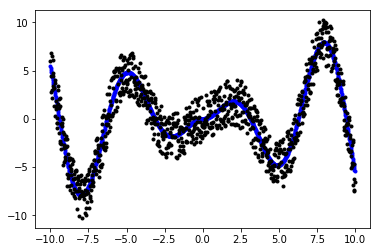

In [2]:
n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-10, 10, num)
y1 = fun(x)
y2 = y1 + nn * std

plt.plot(x, y1, 'b.', x, y2, 'k.')

# Define Essential Functions

I define some funtions that is essential to implement polynomial fitting.

```defA(p,x)``` is a function that makes A matrix in varying p=0,1,2,3,...9.

```getResidual``` automatically calculates the sum of residual with varying p=0,1,2,3,...9. 

```resi_x``` and ```resi_y``` is to plot the error of model.

In [3]:
def defA(p,x):
    res = np.zeros((p+1,num))
    for i in range(p):
        res[i] = x**(p-i)
    res[p] = 1
    return np.matrix(np.transpose(res))

def getResidual(f_hat,y):
    return sum((f_hat - y)**2)

resi_x = range(0,10)
resi_y = np.zeros((10))


# Approximation

Since p varies from 0 to 9, variable ```i``` indicates the varying p.

Matrix A and B are defined in every loop and theta is obtained by **pseudo inverse**.

We use matrix multiplication to calculate least square. 

$$ \theta_{p}x_{1}^{p} + \cdots + \theta_{1}x_{1}^{1} + \theta_{0}x_{1}^{0} = y_{1} $$
$$ \theta_{p}x_{2}^{p} + \cdots + \theta_{1}x_{2}^{1} + \theta_{0}x_{2}^{0} = y_{2} $$
$$ \theta_{p}x_{3}^{p} + \cdots + \theta_{1}x_{3}^{1} + \theta_{0}x_{3}^{0} = y_{3} $$
$$ \vdots $$
$$ \theta_{p}x_{n}^{p} + \cdots + \theta_{1}x_{n}^{1} + \theta_{0}x_{n}^{0} = y_{n} $$

We can write this as matmul.
$$ \begin{pmatrix} x_{1}^{p} & \cdots & x_{1}^{0} \\ \vdots &\ddots & \vdots \\ x_{n}^{p} & \cdots & x_{n}^{0} \end{pmatrix} 
\begin{pmatrix} \theta_{p} \\ \vdots \\ \theta_{0} \end{pmatrix} 
= \begin{pmatrix} y_{1} \\ \vdots \\ y_{n}  \end{pmatrix}$$

We can rewrite this as 
$$ A\theta = B $$

We can derive theta from equation above by pseudo inverse.
$$ \theta = \left( A^{T}A\right)^{-1}A^{T}B $$

```approx``` indicates the model function which can be written as

$$ approx = \hat{f}(x) = \theta_{0}x^{0} + \theta_{1}x^{1} + \cdots + \theta_{p}x^{p} $$

And the error is defined as

$$ resi_y[i] = \sum_{j=1}^{n} r_{j}^{2}$$ where $$r_{j} = y_{j} - \hat{f}(x_{j})$$

[[-1.67400815e-16]]
(1, 1)


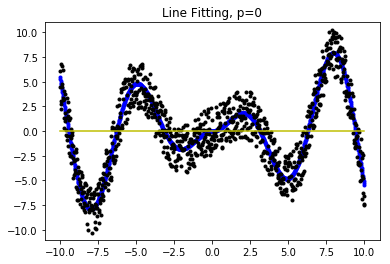

[[ 2.05786450e-01]
 [-1.52655666e-16]]
(2, 1)


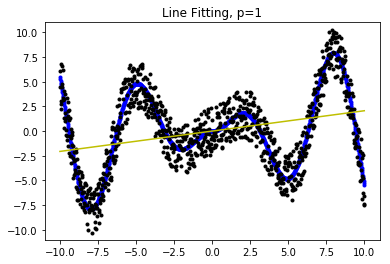

[[ 4.06575815e-19]
 [ 2.05786450e-01]
 [-4.70977424e-16]]
(3, 1)


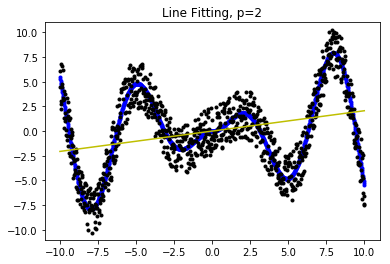

[[ 5.17592537e-03]
 [-1.33898968e-17]
 [-1.05389769e-01]
 [ 4.91794105e-16]]
(4, 1)


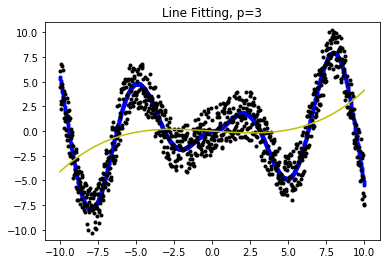

[[-1.80756831e-18]
 [ 5.17592537e-03]
 [ 1.73580768e-16]
 [-1.05389769e-01]
 [-2.30544750e-15]]
(5, 1)


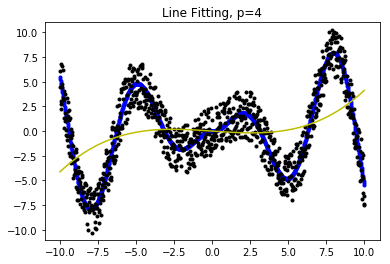

[[-5.59862621e-04]
 [-6.44829242e-17]
 [ 6.75069239e-02]
 [ 5.60272315e-15]
 [-1.44371556e+00]
 [-5.92512150e-14]]
(6, 1)


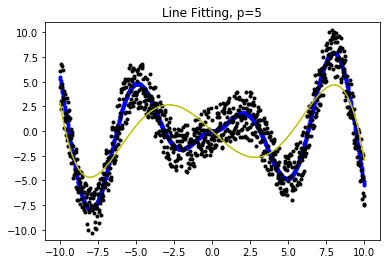

[[ 2.15133663e-17]
 [-5.59862621e-04]
 [-3.01294363e-15]
 [ 6.75069239e-02]
 [ 1.04602091e-13]
 [-1.44371556e+00]
 [-5.36573390e-13]]
(7, 1)


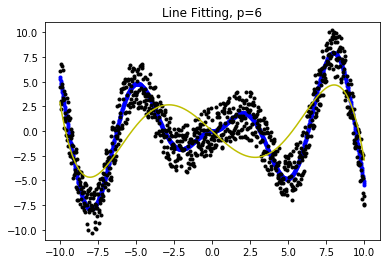

[[-2.29143441e-05]
 [-1.39157984e-17]
 [ 3.14903901e-03]
 [ 2.12746216e-15]
 [-1.01414214e-01]
 [-8.46228469e-14]
 [ 4.36909750e-01]
 [ 5.62313217e-13]]
(8, 1)


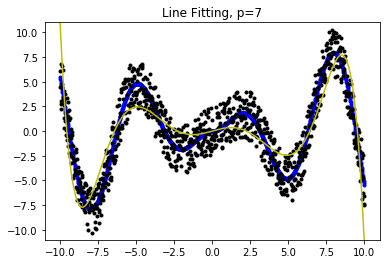

[[ 9.93301310e-18]
 [-2.29143441e-05]
 [-1.93508531e-15]
 [ 3.14903901e-03]
 [ 1.18403659e-13]
 [-1.01414214e-01]
 [-2.35029140e-12]
 [ 4.36909750e-01]
 [ 7.59585710e-12]]
(9, 1)


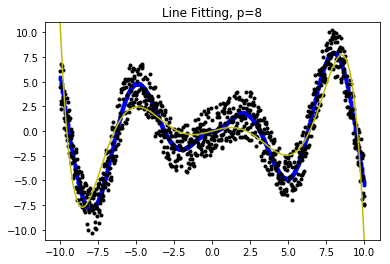

[[ 6.48406059e-07]
 [ 4.30506315e-17]
 [-1.60495278e-04]
 [-8.37175644e-15]
 [ 1.27987281e-02]
 [ 5.11339479e-13]
 [-3.49330563e-01]
 [-1.01421193e-11]
 [ 2.13058297e+00]
 [ 3.30059279e-11]]
(10, 1)


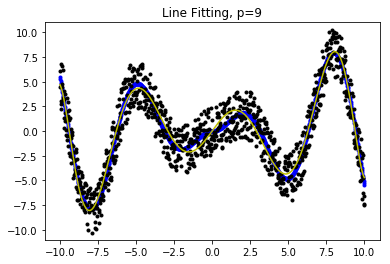

In [4]:
for i in range(10):
    A = defA(i,x)
    B = np.matrix(y1)

    theta = (A.T * A).I*A.T*B.T
    theta = np.asarray(theta)

    print(theta)
    print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(i-j)

    resi_y[i] = getResidual(approx,y1)
    plt.plot(x, y1, 'b.', x, y2, 'k.', x, approx, 'y')
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting, p="+str(i))
    plt.show()

# Plot Error with Varying p

As we stored sum of residuals in ```resi_y```, we can check that error decreases as p goes higher.

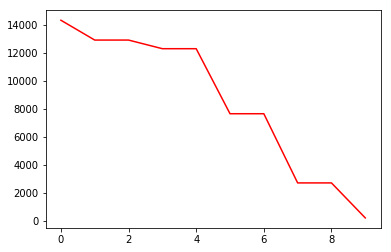

In [5]:
plt.plot(resi_x,resi_y,'r')
plt.show()